# Name: Aishwarya Khairnar

# Task 5: Sales Prediction using Python

In [3]:
import numpy as np
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
un=data["Unnamed: 0"]
un

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [6]:
data=data.drop(["Unnamed: 0"],axis=1)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
x=data.corr()
x


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


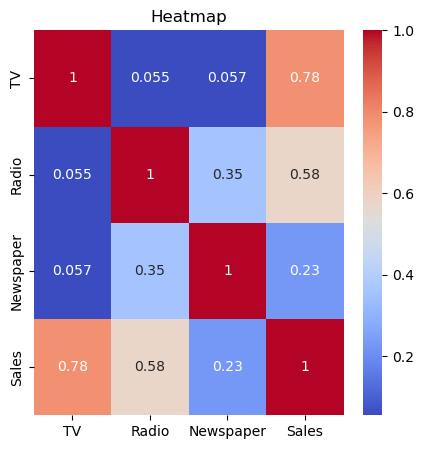

In [10]:
plt.figure(figsize=(5,5))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap")
plt.show()

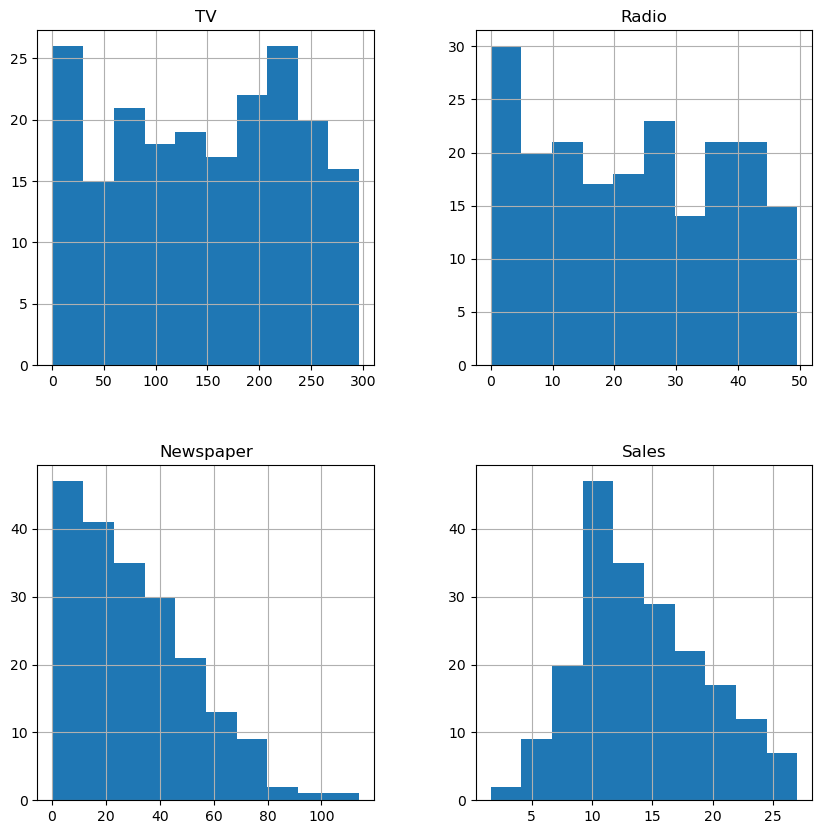

In [11]:
data.hist(figsize=(10,10))
plt.show()

# Outlier Treatment

<Axes: >

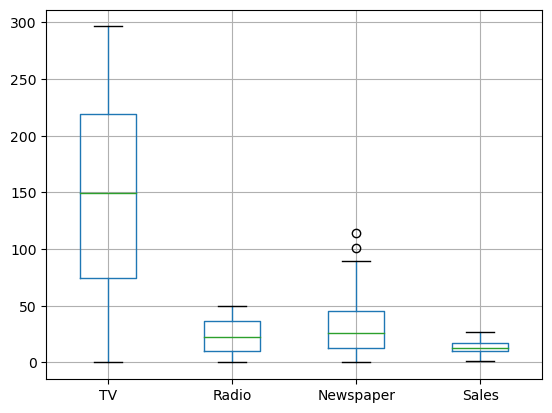

In [12]:
data.boxplot()

<Axes: ylabel='Newspaper'>

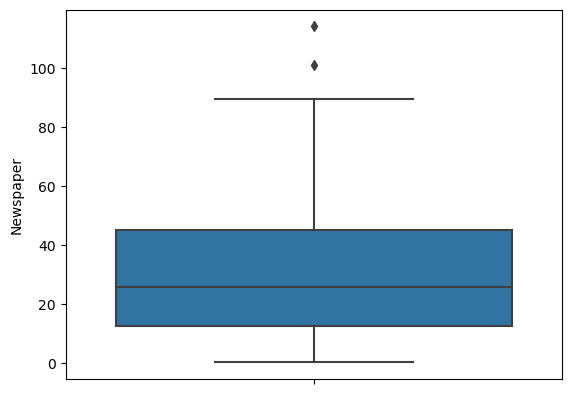

In [13]:
sns.boxplot(data=data,y="Newspaper")

In [14]:
iqr=data.Newspaper.quantile(0.75)-data.Newspaper.quantile(0.25)
iqr

32.35

In [15]:
lb=data["Newspaper"].quantile(0.25)-(iqr*3)
ub=data["Newspaper"].quantile(0.75)+(iqr*3)
print(lb,ub)

-84.30000000000001 142.15


In [16]:
data.loc[data["Newspaper"]>142.15,"Newspaper"]=142.15

<Axes: xlabel='Newspaper', ylabel='Density'>

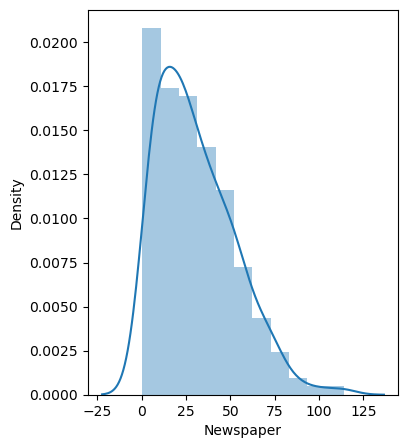

In [17]:
fig=plt.figure(figsize=(4,5))
sns.distplot(data.Newspaper)

In [18]:
data.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

# EDA

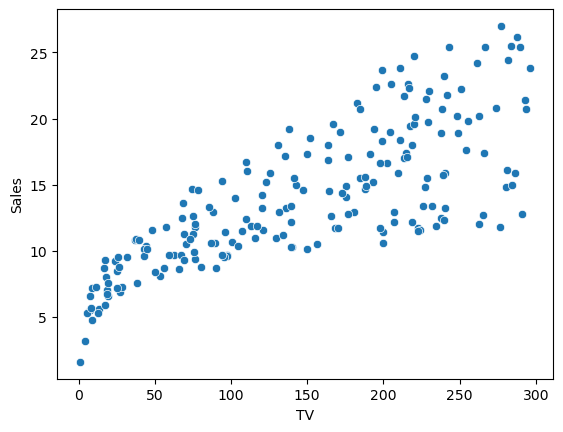

In [19]:
sns.scatterplot(x="TV",y="Sales",data=data)
plt.show()

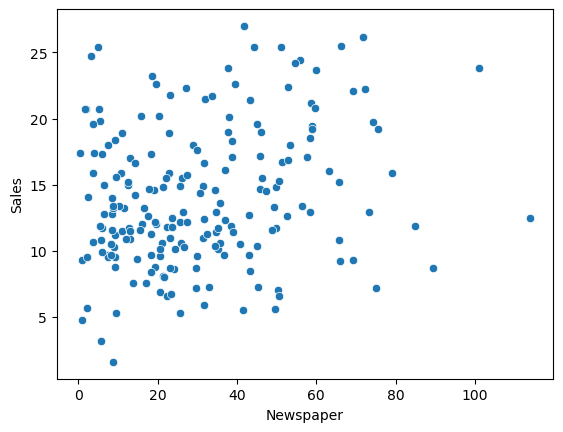

In [20]:
sns.scatterplot(x="Newspaper",y="Sales",data=data)
plt.show()

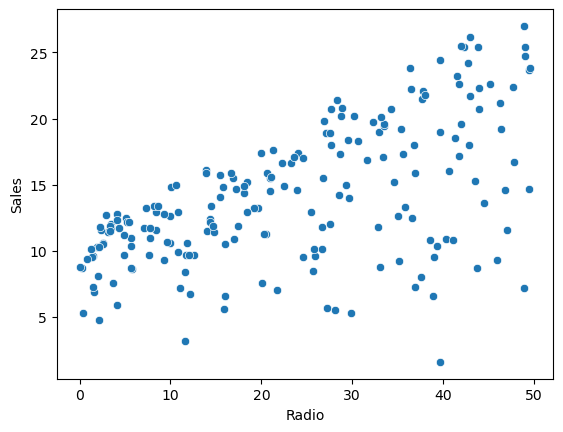

In [21]:
sns.scatterplot(x="Radio",y="Sales",data=data)
plt.show()

# split data into training set and test set

In [22]:
x=data.iloc[:,0:3]
y=data.iloc[:,-1]

In [23]:
import sklearn
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [42]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [44]:
lin.fit(x_train,y_train)

LinearRegression()

In [45]:
lin_p=lin.predict(x_test)
lin_p

array([10.50948755, 20.05723558, 16.82665516, 19.09405782, 20.94383845,
       13.25348896, 11.87554518, 12.4882643 , 20.51420388, 20.91328754,
       10.90182094, 19.44307823,  6.5040246 , 15.3178433 ,  9.04147699,
        8.03952046, 16.26581002, 12.10312044, 17.12086602, 11.28131376,
       17.07036157,  9.84452136, 20.70077487, 17.17479561, 15.19498306,
       21.96631309, 19.1587532 , 10.09216975, 19.40214482, 14.88180369,
       14.27844074,  7.69173892, 10.00183154, 14.82404891,  7.29177732,
       13.63453936,  7.59380446, 11.84106127, 13.61631336, 15.18810875])

In [46]:
lin.coef_

array([0.0455864 , 0.18569816, 0.00223281])

In [47]:
lin.intercept_

2.8172751352950005

In [49]:
R2=lin.score(x_train,y_train)
R2

0.89152823018429

In [50]:
Adj_R2=1-(((1-R2)*(80-1))/(80-9-1))
Adj_R2

0.8775818597794129

In [51]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,lin_p)
mse

1.733292781580774

In [52]:
#RMSE,MAPE

rmse=pow(mse,0.5)
rmse

1.3165457764851072

In [53]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":lin_p})
df1

,Actual,Predicted
126,6.6,10.509488
104,20.7,20.057236
99,17.2,16.826655
92,19.4,19.094058
111,21.8,20.943838
167,12.2,13.253489
116,12.2,11.875545
96,11.7,12.488264
52,22.6,20.514204
69,22.3,20.913288


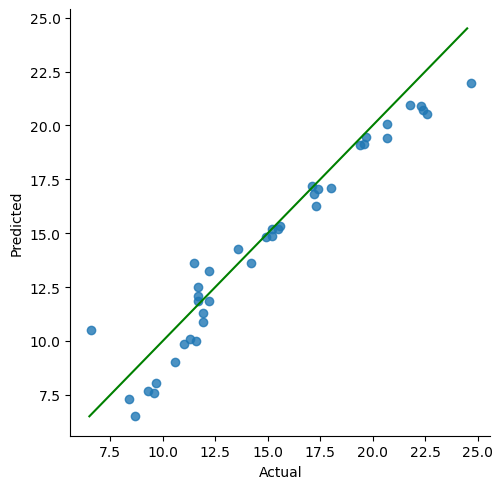

In [54]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# LASSO(L1)

In [26]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [27]:
lasso.fit(x_train,y_train)

Lasso()

In [28]:
l_p=lasso.predict(x_test)
l_p

array([10.44215601, 20.02862068, 16.74044996, 19.02041275, 20.88343922,
       13.330537  , 11.91700355, 12.58556641, 20.4261608 , 20.82803182,
       10.96264957, 19.35888872,  6.58378415, 15.34264825,  9.09755356,
        8.13902858, 16.23978331, 12.15853905, 17.08744168, 11.3007882 ,
       17.08620092,  9.91582399, 20.5784185 , 17.12438332, 15.20878485,
       21.88284121, 19.09789332, 10.10937384, 19.34374446, 14.85630934,
       14.19706408,  7.78285332, 10.04692981, 14.8456998 ,  7.35919454,
       13.63189512,  7.68610449, 11.92036317, 13.70492877, 15.17064866])

In [29]:
lasso.coef_

array([0.04549128, 0.18171712, 0.00129864])

In [30]:
l_R2=lasso.score(x_train,y_train)
l_R2

0.8913511716754414

In [31]:
l_Adj_R2=1-(((1-l_R2)*(80-1))/(80-9-1))
l_Adj_R2

0.877382036605141

In [33]:
from sklearn import metrics
l_mse=metrics.mean_squared_error(y_test,l_p)
l_mse

1.737427684801958

In [34]:
l_df=pd.DataFrame({"Importances":list(lasso.coef_),"column":list(x_test)})
l_df

,Importances,column
0,0.045491,TV
1,0.181717,Radio
2,0.001299,Newspaper


In [35]:
n_df=data.drop(["TV","Newspaper"],axis=1)
n_df

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9
...,...,...
195,3.7,7.6
196,4.9,9.7
197,9.3,12.8
198,42.0,25.5


In [36]:
n_x=n_df.iloc[:,0:1]
n_y=n_df.iloc[:,-1]

In [37]:
n_x

,Radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8
...,...
195,3.7
196,4.9
197,9.3
198,42.0


In [38]:
nx_train,nx_test,ny_train,ny_test=train_test_split(n_x,n_y,test_size=0.2,random_state=101)

In [39]:
nx_train.shape,nx_test.shape,ny_train.shape,ny_test.shape

((160, 1), (40, 1), (160,), (40,))

In [56]:
lin.fit(nx_train,ny_train)

LinearRegression()

In [57]:
n_p=lin.predict(nx_test)
#n_p

In [58]:
n_R2=lin.score(nx_train,ny_train)
n_R2

0.3252412408126151

In [59]:
n_Adj_R2=1-(((1-n_R2)*(160-1))/(160-1-1))
n_Adj_R2

0.32097061575446706

In [60]:
n_mse=metrics.mean_squared_error(ny_test,n_p)
n_mse

19.170356725782206

In [61]:
n_df1=pd.DataFrame({"Actual_n":ny_test,"Predicted_n":n_p})
n_df1

,Actual_n,Predicted_n
37,14.7,19.354963
109,19.8,14.833063
31,11.9,12.923815
89,16.7,19.033406
66,9.5,14.370824
119,6.6,12.642453
54,20.2,15.214912
74,17.0,14.370824
145,10.3,9.808728
142,20.1,16.099195


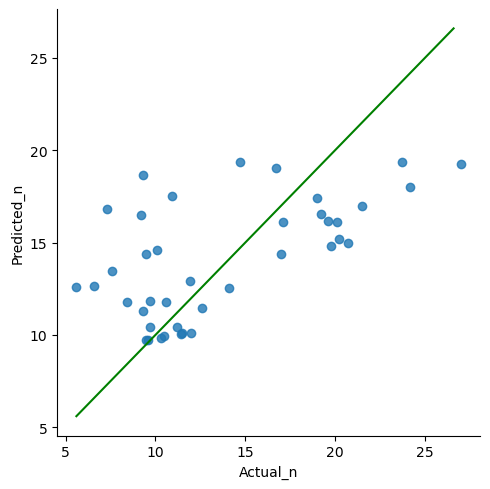

In [62]:
sns.lmplot(x="Actual_n",y="Predicted_n",data=n_df1,fit_reg=False)
d_line=np.arange(n_df1.min().min(),n_df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Ridge

In [63]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [64]:
ridge.fit(x_train,y_train)

Ridge()

In [66]:
r_p=ridge.predict(x_test)

In [68]:
r_df=pd.DataFrame({"Coef":list(ridge.coef_),"col":list(x_test)})
r_df

,Coef,col
0,0.045586,TV
1,0.185692,Radio
2,0.002234,Newspaper


In [69]:
r_R2=ridge.score(x_train,y_train)
r_R2

0.8915282299281433

In [70]:
r_AdR2=1-(((1-r_R2)*(80-1))/(80-9-1))
r_AdR2

0.8775818594903332

In [72]:
r_mse=metrics.mean_squared_error(y_test,r_p)
r_mse

1.7333321558288994

# KNN Regressor

In [73]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)

In [74]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [75]:
knn_p=knn.predict(x_test)

In [76]:
knn_rsq=knn.score(x_train,y_train)
knn_rsq

0.9134515509763264

In [77]:
knn_adr=1-(((1-knn_rsq)*(580-1))/(580-5-1))
knn_adr

0.9126976446259459

In [78]:
knn_MSE=metrics.mean_squared_error(y_test,knn_p)
knn_MSE

3.03289

# SVM Regressor

In [81]:
from sklearn.svm import LinearSVR
sv=LinearSVR()

In [82]:
sv.fit(x_train,y_train)

LinearSVR()

In [83]:
sv_p=sv.predict(x_test)

In [84]:
sv_rsq=sv.score(x_train,y_train)
sv_rsq

0.783482805933393

In [85]:
sv_adr=1-(((1-sv_rsq)*(580-1))/(580-5-1))
sv_adr

0.7815967676575515

In [86]:
sv_MSE=metrics.mean_squared_error(y_test,sv_p)
sv_MSE

5.764098110660148